# Here is my notebook of a sample chess game using a 8x3 board. Each player is given 6 pieces across the left end/strip of the board. We will set the computer to the first player(white). The minmax recursive function will use a basic evalutation function, adding to the computers score for its pieces, and subtracting for blacks.

In [1]:
# pip install python-chess

In [2]:
import chess
import numpy as np
import random
import functools
import math

In [3]:
# Create an empty board
board = chess.Board(None)  # no pieces

# Place 3 white pieces on the first row
board.set_piece_at(chess.A2, chess.Piece(chess.PAWN, chess.WHITE))
board.set_piece_at(chess.B2, chess.Piece(chess.PAWN, chess.WHITE))
board.set_piece_at(chess.C2, chess.Piece(chess.PAWN, chess.WHITE))

# Place 3 black pieces on the first row
board.set_piece_at(chess.A7, chess.Piece(chess.PAWN, chess.BLACK))
board.set_piece_at(chess.B7, chess.Piece(chess.PAWN, chess.BLACK))
board.set_piece_at(chess.C7, chess.Piece(chess.PAWN, chess.BLACK))


# Three offesnsive pieces white
board.set_piece_at(chess.A1, chess.Piece(chess.QUEEN, chess.WHITE))
board.set_piece_at(chess.B1, chess.Piece(chess.KING, chess.WHITE))
board.set_piece_at(chess.C1, chess.Piece(chess.ROOK, chess.WHITE))

# Three offesnive pieces black
board.set_piece_at(chess.A8, chess.Piece(chess.QUEEN, chess.BLACK))
board.set_piece_at(chess.B8, chess.Piece(chess.KING, chess.BLACK))
board.set_piece_at(chess.C8, chess.Piece(chess.ROOK, chess.BLACK))

8 Row 3 Column Board


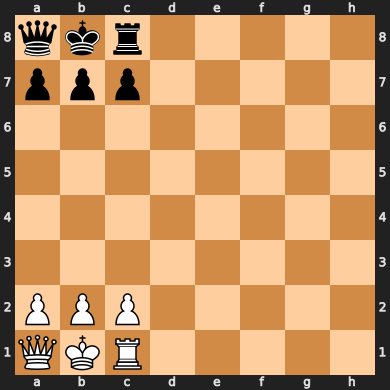

In [4]:
print("8 Row 3 Column Board")
display(board)

In [5]:
board.piece_map().items()

dict_items([(58, Piece.from_symbol('r')), (57, Piece.from_symbol('k')), (56, Piece.from_symbol('q')), (50, Piece.from_symbol('p')), (49, Piece.from_symbol('p')), (48, Piece.from_symbol('p')), (10, Piece.from_symbol('P')), (9, Piece.from_symbol('P')), (8, Piece.from_symbol('P')), (2, Piece.from_symbol('R')), (1, Piece.from_symbol('K')), (0, Piece.from_symbol('Q'))])

In [6]:
# Create min max algorithm for computer to make the best move

def evaluate_board(board):
    """Simple evaluation: positive means White advantage."""
    piece_values = {
        chess.PAWN: 1,
        chess.KNIGHT: 3,
        chess.BISHOP: 3,
        chess.ROOK: 5,
        chess.QUEEN: 9,
        chess.KING: 0,  # king not used for material eval
    }

    score = 0
    for _, piece in board.piece_map().items():
        value = piece_values.get(piece.piece_type, 0)
        if piece.color == chess.WHITE:
            score += value
        else:
            score -= value
    return score



def min_max(board, depth, maximizing_player):
    # Base case
    if depth == 0 or board.is_game_over():
        return evaluate_board(board)

    if maximizing_player:
        max_eval = float('-inf')
        for move in board.legal_moves:
            board.push(move)
            # Skip moves that go outside valid board
            if not is_valid_move(move):
                board.pop()
                continue
            eval = min_max(board, depth - 1, False)
            board.pop()
            max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for move in board.legal_moves:
            board.push(move)
            if not is_valid_move(move):
                board.pop()
                continue
            eval = min_max(board, depth - 1, True)
            board.pop()
            min_eval = min(min_eval, eval)
        return min_eval



# Create function to actually make the move utilizing the min_max algorithm
def make_move(board, depth=3):
    best_move = None
    best_eval = float('-inf')

    possible_moves = [
        move for move in board.legal_moves if is_valid_move(move)
    ]

    for move in possible_moves:
        board.push(move)
        eval = min_max(board, depth - 1, False)
        board.pop()
        if eval > best_eval:
            best_eval = eval
            best_move = move
    return best_move

valid_squares = {chess.square(file, rank) for file in range(0, 3) for rank in range(0, 8)}
def is_valid_move(move):
    return move.from_square in valid_squares and move.to_square in valid_squares

In [7]:
# #print(valid_squares)
# while not board.is_game_over():
#     print("Current board:")
#     display(board)

#     # ------------------ AI TURN ------------------
#     if board.turn == chess.WHITE:
#         legal_moves = [m for m in board.legal_moves if is_valid_move(m)]
#         if not legal_moves:
#             print("White has no legal moves. Game over.")
#             break

#         move = make_move(board, depth=3)
#         print(f"White plays: {move.uci()}")
#         print("---------------------------------------------------------\n")
#         board.push(move)

#     # ------------------ HUMAN TURN ------------------
#     else:
#         legal_moves = [m for m in board.legal_moves if is_valid_move(m)]
#         if not legal_moves:
#             print("Black has no legal moves. Game over.")
#             break

#         print("Your turn! Enter a move in UCI format (e.g., a7a6, b7b6, c7c6)")
#         print("Legal moves:", [m.uci() for m in legal_moves])
#         print("Or type 'quit' to quit")

#         user_input = input("Your move: ").strip().lower()
#         if user_input == "quit":
#             print("Quitting the game.")
#             break

#         try:
#             move = chess.Move.from_uci(user_input)
#             if move in legal_moves:
#                 board.push(move)
#             else:
#                 print("Invalid move. Try again.\n")
#                 continue
#         except ValueError:
#             print("Invalid move format. Try again.\n")
#             continue

# print("\nFinal board:")
# display(board)
# print("Game result:", board.result())

<p align="center">

$$
\text{UCT} = \text{win\_rate} + C \sqrt{\frac{\ln N_{\text{parent}}}{N_{\text{child}}}}
$$

</p>


## We will utilze both a Monte Carlo Tree Search for evaluation, and a min max algorthm to search through different boards. The above equation is the one the MCTS uses during the selection phase

1. Selection
2. Expansion
3. Rollout
4. Backprop

Current board:


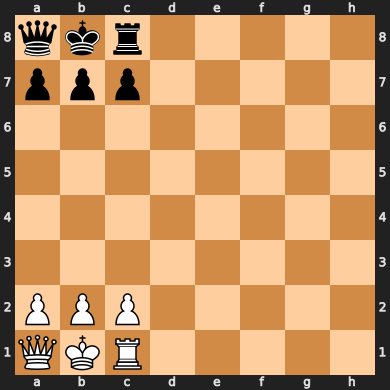

Computer thinking...
The best move is: a2a4, with score: 0.5272727272727272
White (Compuer) plays: a2a4
Current board:


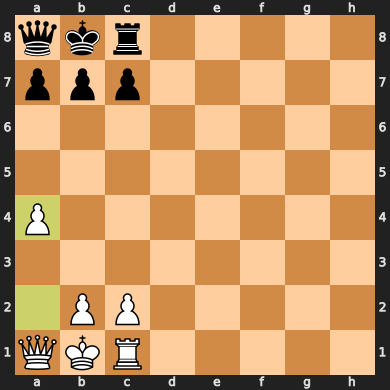

Your turn! Enter a move in UCI format (e.g., a7a6, b7b6, c7c6)
Legal moves: ['c7c6', 'b7b6', 'a7a6', 'c7c5', 'b7b5', 'a7a5']
Or type 'quit' to quit


Your move:  c7c5


Current board:


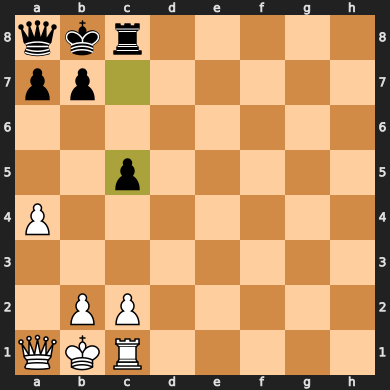

Computer thinking...
The best move is: a1a2, with score: 0.5441176470588235
White (Compuer) plays: a1a2
Current board:


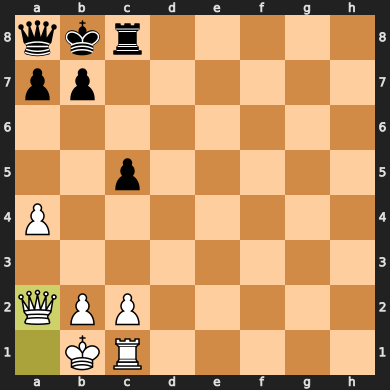

Your turn! Enter a move in UCI format (e.g., a7a6, b7b6, c7c6)
Legal moves: ['c8c7', 'c8c6', 'b8c7', 'b7b6', 'a7a6', 'c5c4', 'b7b5', 'a7a5']
Or type 'quit' to quit


Your move:  c8c6


Current board:


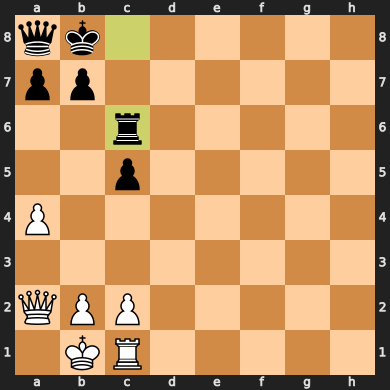

Computer thinking...
The best move is: a4a5, with score: 0.5208333333333334
White (Compuer) plays: a4a5
Current board:


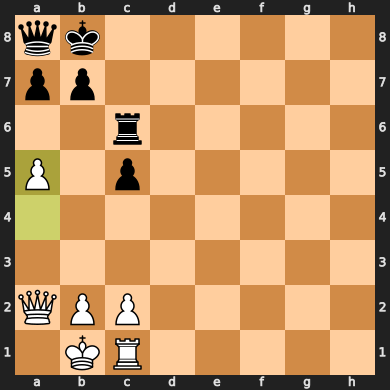

Your turn! Enter a move in UCI format (e.g., a7a6, b7b6, c7c6)
Legal moves: ['b8c8', 'b8c7', 'c6c8', 'c6c7', 'c6b6', 'c6a6', 'b7b6', 'a7a6', 'c5c4', 'b7b5']
Or type 'quit' to quit


In [ ]:
def random_playout(board):
    """Play random moves until game ends. Return 1 if white wins, 0 if black wins, 0.5 if draw."""
    sim_board = board.copy()
    while not sim_board.is_game_over():
        legal_moves = [m for m in sim_board.legal_moves if is_valid_move(m)]
        if not legal_moves:
            break
        sim_board.push(random.choice(legal_moves))
    result = sim_board.result()
    if result == "1-0": 
        return 1 # Computer Wins
    if result == "0-1": 
        return 0 # We(Human) Wins
    return 0.5 # No one wins/draw/stalemate


def mcts_move(board, simulations):
    """pick the move with best average win rate after random playouts."""
    legal_moves = [m for m in board.legal_moves if is_valid_move(m)]
    if not legal_moves:
        return None

    # Stats dictionaries
    wins = {move: 0 for move in legal_moves}
    visits = {move: 0 for move in legal_moves}

    for _ in range(simulations):
        move = random.choice(legal_moves) # Choos Random Move
        temp_board = board.copy()
        temp_board.push(move) # Make move

        # Simulate random game
        result = random_playout(temp_board) # Play random move

        # Update stats 
        if board.turn == chess.WHITE:
            wins[move] += result
        else:
            wins[move] += (1 - result)  # invert result if black to move
        visits[move] += 1

    # Compute average win rate per move
    move_scores = {m: wins[m] / (visits[m]) for m in legal_moves}
    best_move = max(move_scores, key=move_scores.get)
    print(f"The best move is: {best_move}, with score: {move_scores[best_move]}")
    return best_move


# ------------------- GAME LOOP -------------------
while not board.is_game_over():
    print("Current board:")
    display(board)

    if board.turn == chess.WHITE:
        print("Computer thinking...")
        move = mcts_move(board, simulations=300)
        if move is None:
            print("White has no legal moves. Game over.")
            break
        print(f"White (Compuer) plays: {move.uci()}")
        board.push(move)
    else:
        legal_moves = [m for m in board.legal_moves if is_valid_move(m)]
        if not legal_moves:
            print("Black has no legal moves. Game over.")
            break

        print("Your turn! Enter a move in UCI format (e.g., a7a6, b7b6, c7c6)")
        print("Legal moves:", [m.uci() for m in legal_moves])
        print("Or type 'quit' to quit")
        user_input = input("Your move: ").strip().lower()
        if user_input == "quit":
            print("Quitting the game.")
            break

        try:
            move = chess.Move.from_uci(user_input)
            if move in legal_moves:
                board.push(move)
            else:
                print("Invalid move. Try again.\n")
                continue
        except ValueError:
            print("Invalid move format. Try again.\n")
            continue

print("\nFinal board:")
display(board)
print("Game result:", board.result())